<a href="https://colab.research.google.com/github/r12habh/Scaler-DSML/blob/main/Netflix_Data_Exploration_and_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploring Netflix dataset and finding insights from it.**

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Playing with data

**This section is EDA without visualization. Just exploring the dataset.**

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv').set_index('show_id')
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.tail()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [4]:
df.shape

(8807, 11)

df.describe : but this will work for duration only with include='all'

In [5]:
df.describe(include='all')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [6]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['month_added_name'] = df['date_added'].dt.month_name()
df['release_year'] = df['release_year'].astype(int)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_added_name
show_id,,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,September
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,September
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,September
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,September
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,September


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   type              8807 non-null   object        
 1   title             8807 non-null   object        
 2   director          6173 non-null   object        
 3   cast              7982 non-null   object        
 4   country           7976 non-null   object        
 5   date_added        8797 non-null   datetime64[ns]
 6   release_year      8807 non-null   int64         
 7   rating            8803 non-null   object        
 8   duration          8804 non-null   object        
 9   listed_in         8807 non-null   object        
 10  description       8807 non-null   object        
 11  year_added        8797 non-null   float64       
 12  month_added       8797 non-null   float64       
 13  month_added_name  8797 non-null   object        
dtypes: datetime64[ns](1), float

In [8]:
df['type'].value_counts(dropna=False)

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [9]:
df['director'].value_counts(dropna=False)

NaN                               2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4529, dtype: int64

In [10]:
df['cast'] = [None if isinstance(x, float) else tuple(x.strip().split(',')) for x in df['cast']]

In [11]:
df['cast'].value_counts(dropna=False)

NaN                                                                                                                                                                                                         825
(David Attenborough,)                                                                                                                                                                                        19
(Vatsal Dubey,  Julie Tejwani,  Rupa Bhimani,  Jigna Bhardwaj,  Rajesh Kava,  Mousam,  Swapnil)                                                                                                              14
(Samuel West,)                                                                                                                                                                                               10
(Jeff Dunham,)                                                                                                                                                          

In [12]:
df['cast'].explode().dropna().value_counts()

 Anupam Kher              39
 Rupa Bhimani             31
 Takahiro Sakurai         30
 Julie Tejwani            28
 Om Puri                  27
                          ..
 Vedika                    1
 Tedros Teclebrhan         1
 Maryam Zaree              1
 Melanie Straub            1
 Chittaranjan Tripathy     1
Name: cast, Length: 39296, dtype: int64

In [13]:
df['country'] = [None if pd.isna(x) else tuple(x.strip().split(',')) for x in df['country']]

In [14]:
df['country'].value_counts(dropna=False)

(United States,)                               2818
(India,)                                        972
NaN                                             831
(United Kingdom,)                               419
(Japan,)                                        245
                                               ... 
(Romania,  Bulgaria,  Hungary)                    1
(Uruguay,  Guatemala)                             1
(France,  Senegal,  Belgium)                      1
(Mexico,  United States,  Spain,  Colombia)       1
(United Arab Emirates,  Jordan)                   1
Name: country, Length: 749, dtype: int64

In [15]:
df['country'].explode().dropna().value_counts()

United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
                  ... 
 Ecuador             1
Iran                 1
Cyprus               1
 Mongolia            1
 Montenegro          1
Name: country, Length: 197, dtype: int64

In [16]:
df['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [17]:
df['rating'].value_counts(dropna=False)

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NaN            4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

### **Assuming that the mins in rating are actually duration which is misplaced in the wrong column.**

In [18]:
df[df['duration'].isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_added_name
show_id,,,,,,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,"(Louis C.K.,)","(United States,)",2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017.0,4.0,April
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,"(Louis C.K.,)","(United States,)",2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016.0,9.0,September
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,"(Louis C.K.,)","(United States,)",2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016.0,8.0,August


In [19]:
df.loc[df['rating'] == '66 min', 'duration'] = '66 min'
df.loc[df['rating'] == '74 min', 'duration'] = '74 min'
df.loc[df['rating'] == '84 min', 'duration'] = '84 min'
df[df['duration'].isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_added_name
show_id,,,,,,,,,,,,,,


In [20]:
df.loc[df['rating'] == '66 min', 'rating'] = np.nan
df.loc[df['rating'] == '74 min', 'rating'] = np.nan
df.loc[df['rating'] == '84 min', 'rating'] = np.nan
df['rating'].value_counts(dropna=False)

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
NaN            7
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

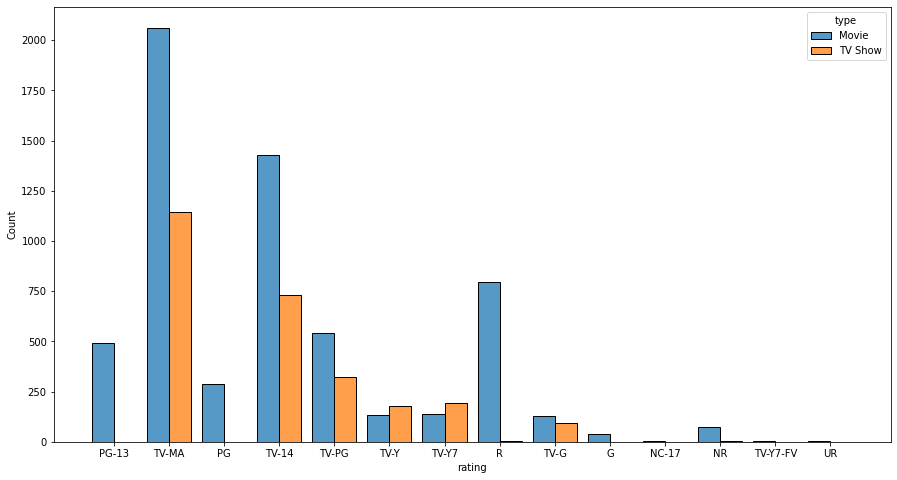

In [21]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x='rating', hue='type', multiple='dodge', shrink=.8)
plt.show()

In [22]:
df.loc[df['rating'].isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_added_name
show_id,,,,,,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,"(Louis C.K.,)","(United States,)",2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017.0,4.0,April
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,"(Louis C.K.,)","(United States,)",2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016.0,9.0,September
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,"(Louis C.K.,)","(United States,)",2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...,2016.0,8.0,August
s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"(Oprah Winfrey, Ava DuVernay)",None,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,2017.0,1.0,January
s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"(Kaito Ishikawa, Hisako Kanemoto, Ai Kayano,...","(Japan,)",2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel...",2016.0,12.0,December
s7313,TV Show,Little Lunch,NaN,"(Flynn Curry, Olivia Deeble, Madison Lu, Oi...","(Australia,)",2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take...",2018.0,2.0,February
s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"(Leone Frisa, Paolo Vaccarino, Francesco Mig...","(Italy,)",2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",2017.0,3.0,March


In [23]:
df['duration'].value_counts(dropna=False)

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [24]:
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [25]:
df['year_added'].value_counts(dropna=False)

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
NaN         10
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: year_added, dtype: int64

In [26]:
df['month_added'].value_counts(dropna=False)

7.0     827
12.0    813
9.0     770
4.0     764
10.0    760
8.0     755
3.0     742
1.0     738
6.0     728
11.0    705
5.0     632
2.0     563
NaN      10
Name: month_added, dtype: int64

In [27]:
df[df.isnull().all(axis=1)]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_added_name
show_id,,,,,,,,,,,,,,


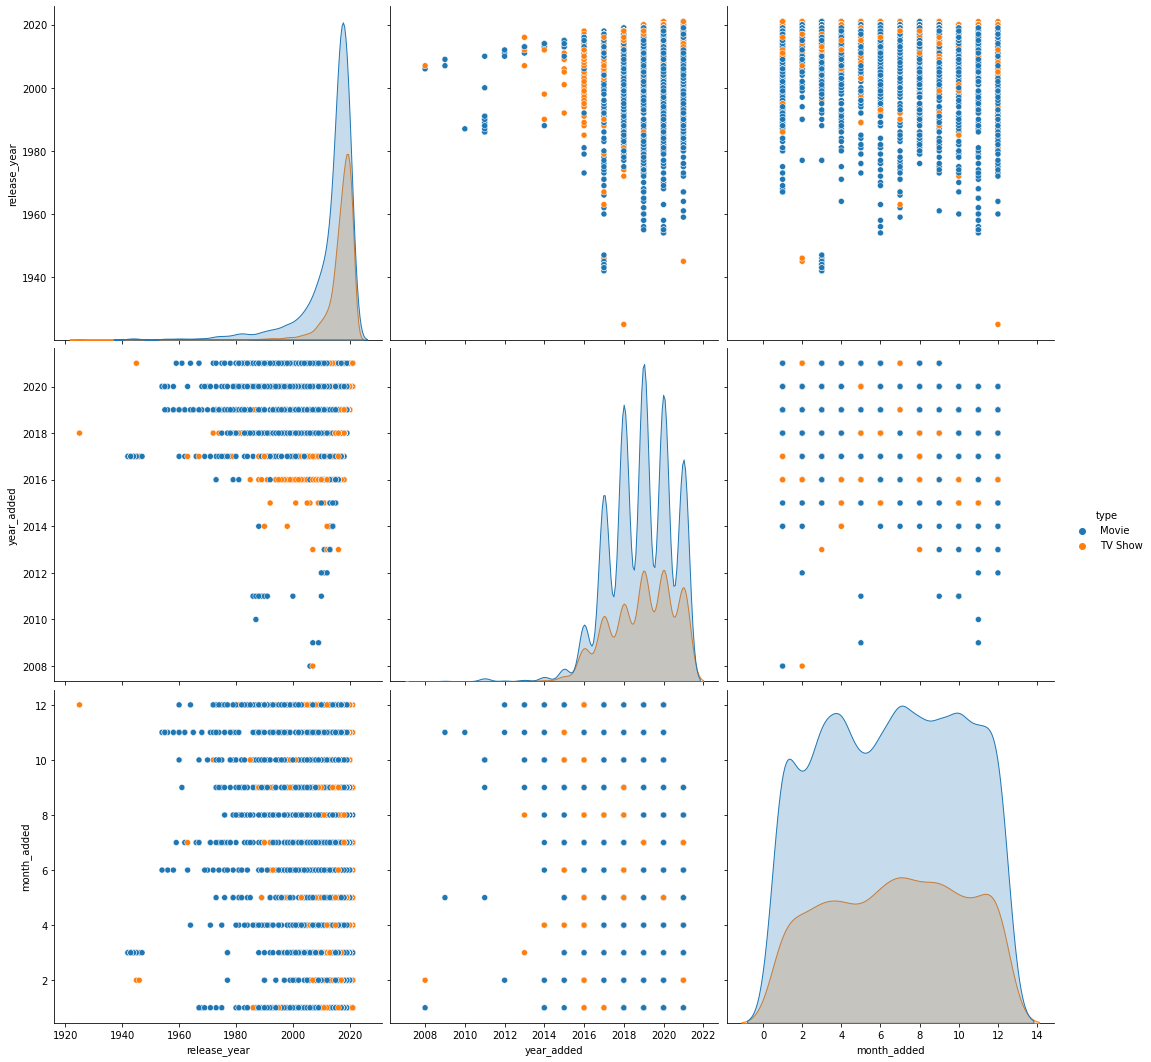

In [28]:
sns.pairplot(data=df, hue='type', height=5)
plt.show()

In [29]:
df.listed_in = [tuple(x.strip().split(',')) for x in df['listed_in']]
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_added_name
show_id,,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,"(United States,)",2021-09-25,2020,PG-13,90 min,"(Documentaries,)","As her father nears the end of his life, filmm...",2021.0,9.0,September
s2,TV Show,Blood & Water,NaN,"(Ama Qamata, Khosi Ngema, Gail Mabalane, Th...","(South Africa,)",2021-09-24,2021,TV-MA,2 Seasons,"(International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",2021.0,9.0,September
s3,TV Show,Ganglands,Julien Leclercq,"(Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",None,2021-09-24,2021,TV-MA,1 Season,"(Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,2021.0,9.0,September
s4,TV Show,Jailbirds New Orleans,NaN,None,None,2021-09-24,2021,TV-MA,1 Season,"(Docuseries, Reality TV)","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,September
s5,TV Show,Kota Factory,NaN,"(Mayur More, Jitendra Kumar, Ranjan Raj, Al...","(India,)",2021-09-24,2021,TV-MA,2 Seasons,"(International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...,2021.0,9.0,September


In [30]:
df.listed_in.value_counts()

(Dramas,  International Movies)                           362
(Documentaries,)                                          359
(Stand-Up Comedy,)                                        334
(Comedies,  Dramas,  International Movies)                274
(Dramas,  Independent Movies,  International Movies)      252
                                                         ... 
(Kids' TV,  TV Action & Adventure,  TV Dramas)              1
(TV Comedies,  TV Dramas,  TV Horror)                       1
(Children & Family Movies,  Comedies,  LGBTQ Movies)        1
(Kids' TV,  Spanish-Language TV Shows,  Teen TV Shows)      1
(Cult Movies,  Dramas,  Thrillers)                          1
Name: listed_in, Length: 514, dtype: int64

In [31]:
df['cast']

show_id
s1                                                    None
s2       (Ama Qamata,  Khosi Ngema,  Gail Mabalane,  Th...
s3       (Sami Bouajila,  Tracy Gotoas,  Samuel Jouy,  ...
s4                                                    None
s5       (Mayur More,  Jitendra Kumar,  Ranjan Raj,  Al...
                               ...                        
s8803    (Mark Ruffalo,  Jake Gyllenhaal,  Robert Downe...
s8804                                                 None
s8805    (Jesse Eisenberg,  Woody Harrelson,  Emma Ston...
s8806    (Tim Allen,  Courteney Cox,  Chevy Chase,  Kat...
s8807    (Vicky Kaushal,  Sarah-Jane Dias,  Raaghav Cha...
Name: cast, Length: 8807, dtype: object

# Netflix EDA & Visualisation 

## Netflix Dataset

In [32]:
netflix = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**The datasset contains 12 columns for exploratory analysis.**

In [33]:
netflix.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [34]:
netflix.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [35]:
sns.set(style='darkgrid')

In [36]:
netflix['type'].value_counts(normalize=True)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

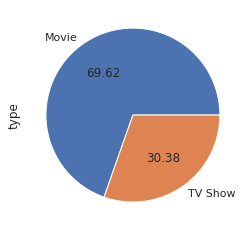

In [37]:
netflix['type'].value_counts().plot(kind='pie', autopct='%.2f')

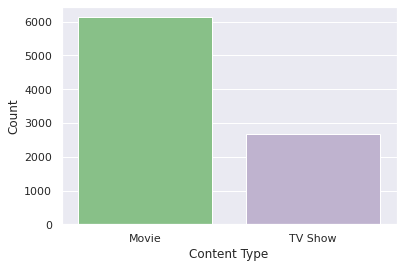

In [38]:
sns.countplot(x='type', data=netflix, palette="Accent")
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

1.   **There are two types of content to watch on Netflix, i.e., Movie & TV Shows.**
2.   **There are more twice as much Movies as compared to TV Shows on Netflix.**


In [39]:
netflix_release_data = netflix[['type', 'date_added']].dropna()
netflix_release_data['date_added'] = pd.to_datetime(netflix_release_data['date_added'])
netflix_release_data['year_added'] = netflix_release_data['date_added'].dt.year
netflix_release_data['month_added'] = netflix_release_data['date_added'].dt.month_name()

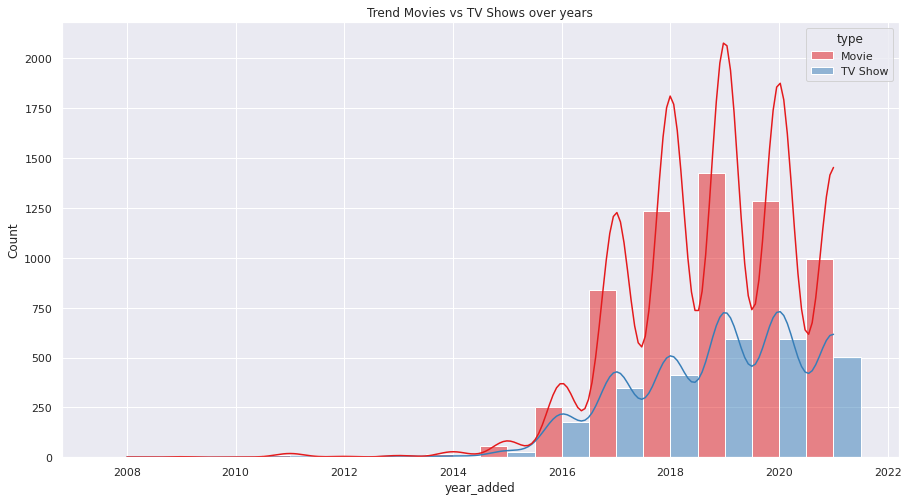

In [40]:
plt.figure(figsize=(15, 8))
sns.histplot(data=netflix_release_data, x='year_added', hue='type', multiple='dodge', kde=True, discrete=True, palette='Set1')
plt.title('Trend Movies vs TV Shows over years')
plt.show()



1.   **More movies are added every year on Netflix compared to TV shows.**
2.   **Highest number of movies were added during 2019.**



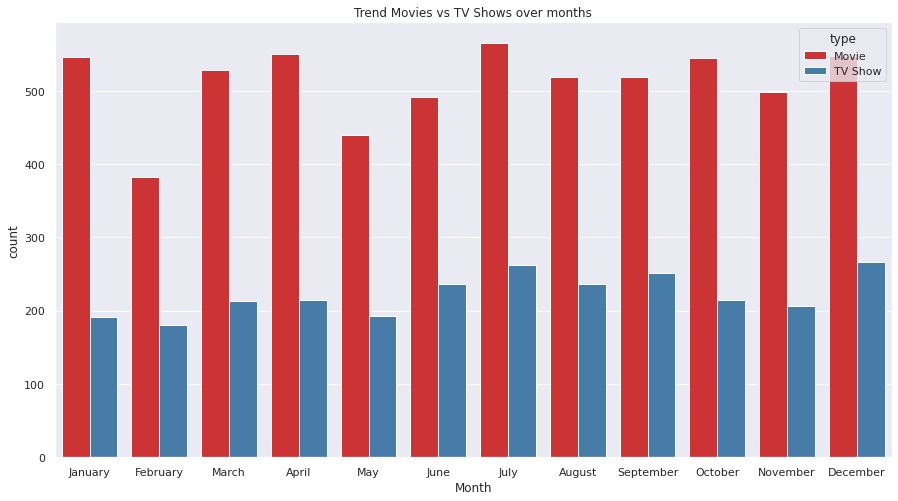

In [41]:
month_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(15, 8))
sns.countplot(data=netflix_release_data, x='month_added', hue='type', palette='Set1', order=month_order)
plt.title('Trend Movies vs TV Shows over months')
plt.xlabel('Month')
plt.show()



1.   **April and July are the months with highest number of movies being added to Netflix.**
2.   **July and December are the months when highest number of TV shows are added.**



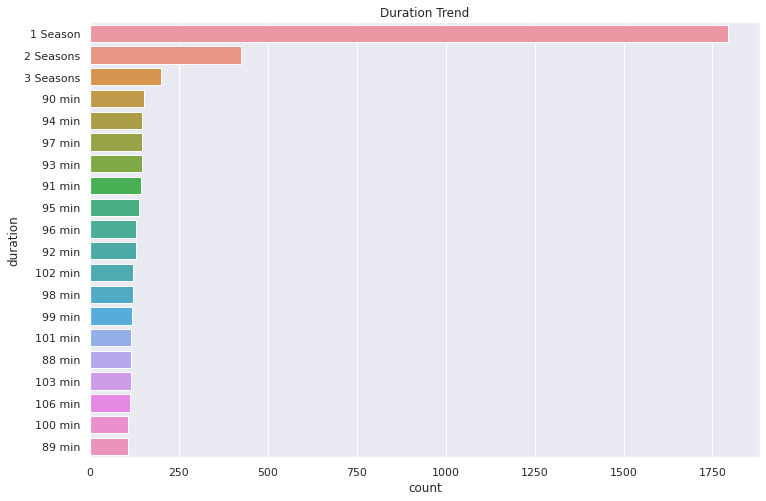

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(data=netflix, y='duration', order=netflix['duration'].value_counts().iloc[:20].index)
plt.title('Duration Trend')
plt.show()


**Most of the TV shows are of 1 season.**



## Rating Analysis

In [43]:
netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [44]:
valid_ratings = ['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R', 'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR']

In [45]:
netflix.loc[netflix['rating'] == '66 min', 'rating'] = np.nan
netflix.loc[netflix['rating'] == '74 min', 'rating'] = np.nan
netflix.loc[netflix['rating'] == '84 min', 'rating'] = np.nan
netflix_ratings = netflix[netflix['rating'].notna()]
netflix_ratings['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [46]:
# https://www.primevideo.com/help/ref=atv_hp_nd_cnt?nodeId=GFGQU3WYEG6FSJFJ
local_rating_values = ['Kids (All)', 'Older Kids (7+)', 'Teens (13+)', 'Young Adults (16+)', 'Adults (18+)']
maturity_rating_map = {
    'G': local_rating_values[0], 
    'TV-G': local_rating_values[0],
    'TV-Y': local_rating_values[0],
    'PG': local_rating_values[1], 
    'TV-Y7': local_rating_values[1], 
    'TV-Y7-FV': local_rating_values[1],
    'TV-PG': local_rating_values[1], 
    'PG-13': local_rating_values[2], 
    'TV-14': local_rating_values[3],
    'NC-17': local_rating_values[4], 
    'NR': local_rating_values[4], 
    'UR': local_rating_values[4],
    'R': local_rating_values[4],
    'TV-MA': local_rating_values[4]  
}

In [47]:
netflix_ratings['local_rating'] = netflix_ratings['rating'].map(maturity_rating_map)
netflix_ratings.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,local_rating
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens (13+)
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults (18+)
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults (18+)
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults (18+)
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults (18+)


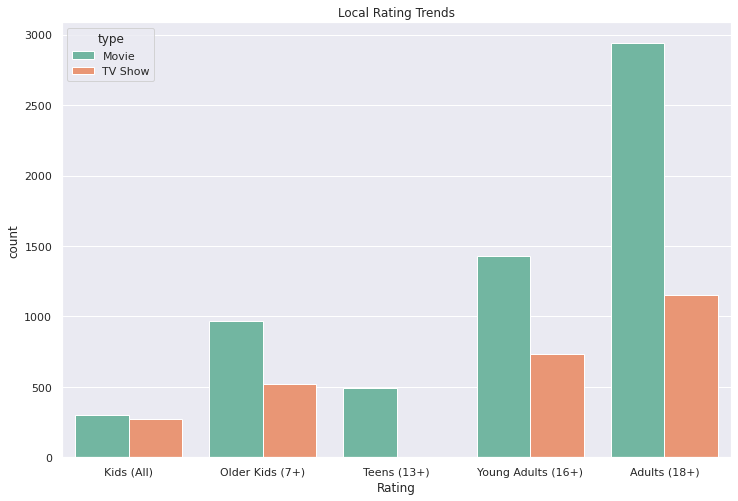

In [48]:
plt.figure(figsize=(12,8))
sns.countplot(x='local_rating', hue='type', data=netflix_ratings, palette='Set2', order=local_rating_values)
plt.title('Local Rating Trends')
plt.xlabel('Rating')
plt.show()



1.   **There are no movies for Teens rating specifically.**
2.   **Most of the content available on Netflix is for 18+ age group.**



## Movie Data Analysis

In [49]:
netflix_movies = netflix[netflix['type'] == 'Movie']
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [50]:
netflix_movies.loc[netflix_movies['rating'] == '66 min', 'rating'] = np.nan
netflix_movies.loc[netflix_movies['rating'] == '74 min', 'rating'] = np.nan
netflix_movies.loc[netflix_movies['rating'] == '84 min', 'rating'] = np.nan

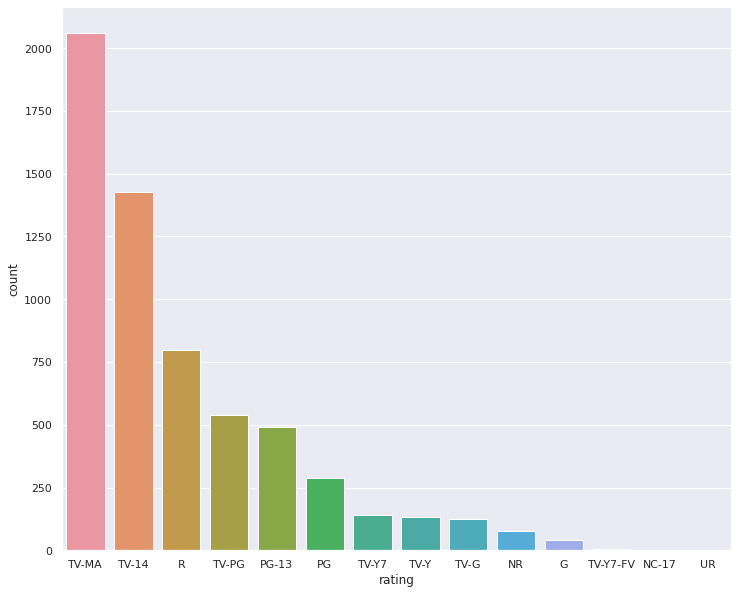

In [51]:
plt.figure(figsize=(12,10))
sns.countplot(data=netflix_movies, x='rating', order=netflix_movies['rating'].value_counts().index)
plt.show()

**Maxiumum movies available on Netflix is with 'TV-MA' rating.**

**Second largest count is of 'TV-14' rating.**

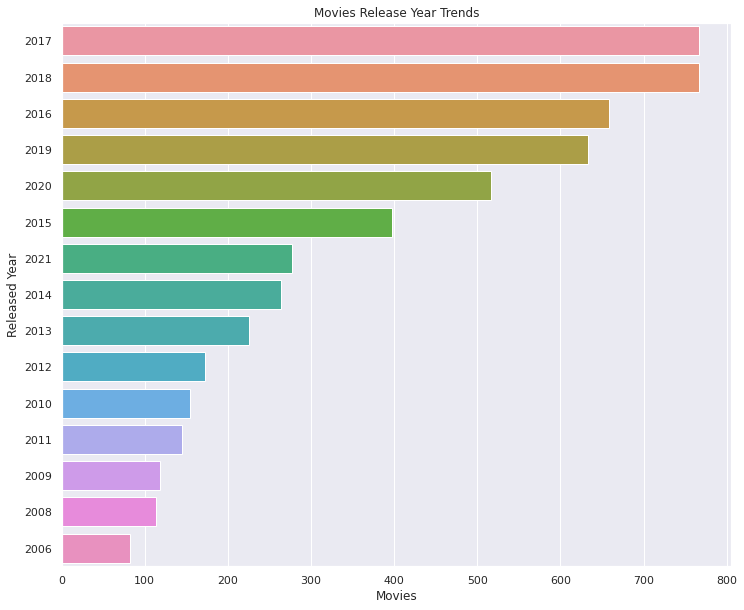

In [52]:
plt.figure(figsize=(12,10))
sns.countplot(y='release_year', data=netflix_movies, order=netflix_movies['release_year'].value_counts().index[:15])
plt.title('Movies Release Year Trends')
plt.xlabel('Movies')
plt.ylabel('Released Year')
plt.show()

**2017 & 2018 were the years when most number of movies were released.**

### Top 10 countries with most movies

In [53]:
netflix_movies['country'] = [None if pd.isna(x) else tuple(y.strip() for y in x.strip().split(',')) for x in netflix_movies['country']]

In [54]:
movie_countries = netflix_movies['country'].explode().dropna().value_counts().rename_axis('country').reset_index(name='counts')

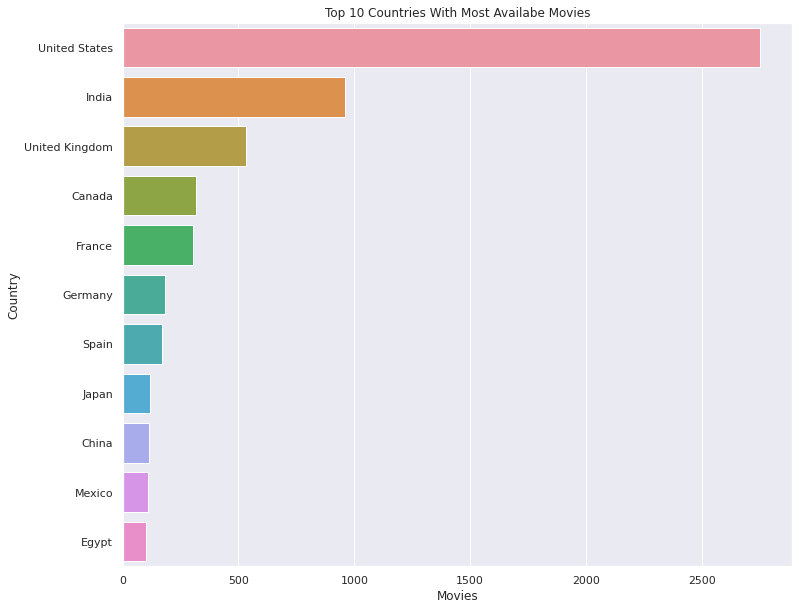

In [55]:
plt.figure(figsize=(12,10))
sns.barplot(y='country', x='counts', data=movie_countries.loc[:10])
plt.title('Top 10 Countries With Most Availabe Movies')
plt.xlabel('Movies')
plt.ylabel('Country')
plt.show()



1.   **The USA has the highest number of movies available on Netflix.**
2.   **Netflix should increase the movies in other countries too, atleast in the top 3 after USA in the above graph.**



In [56]:
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '')

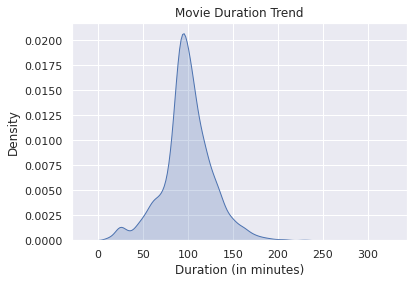

In [57]:
sns.kdeplot(data=netflix_movies['duration'].dropna().astype(str).astype(int), shade=True)
plt.title('Movie Duration Trend')
plt.xlabel('Duration (in minutes)')
plt.show()

**Most movies on Netflix have a duration of 75 to 125 minutes.**

**To be specific, most of the movies produced are in 80-90 mins range, maybe thats the optimal duration for a movie.**

In [58]:
netflix_movies['listed_in'] = [None if pd.isna(x) else tuple(y.strip() for y in x.strip().split(',')) for x in netflix_movies['listed_in']]
movie_generes = netflix_movies['listed_in'].explode().dropna().value_counts().rename_axis('genre').reset_index(name='count')

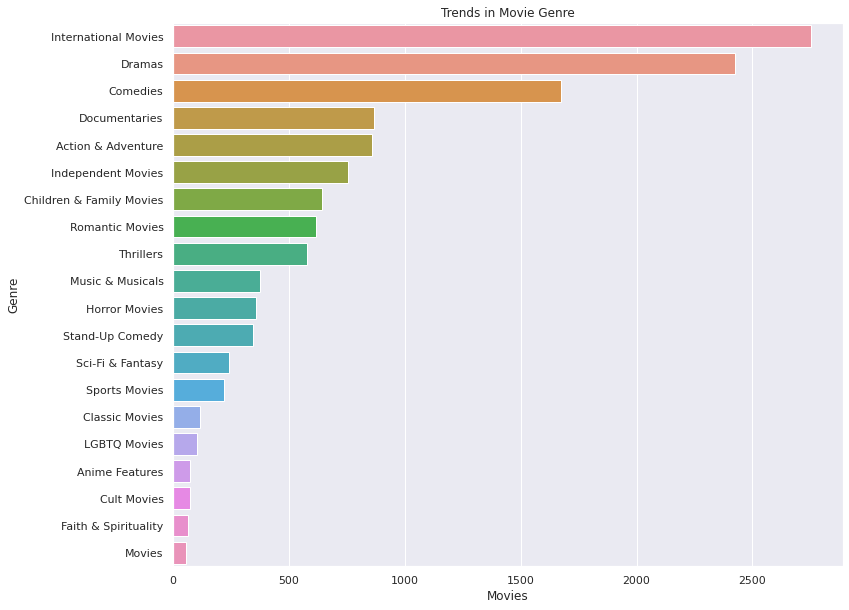

In [59]:
plt.figure(figsize=(12,10))
sns.barplot(y='genre', x='count', data=movie_generes)
plt.title('Trends in Movie Genre')
plt.xlabel('Movies')
plt.ylabel('Genre')
plt.show()

**It is clear that dramas, comedies and documentaries are the top three genres that have the highest amount of movies on Netflix.**
**International Movies are more of a category then a genre, hence not considering it.**

### Cast

In [60]:
netflix_movies['cast'] = [None if pd.isna(x) else tuple(y.strip() for y in x.strip().split(',')) for x in netflix_movies['cast']]
movie_cast = netflix_movies['cast'].explode().dropna().value_counts().rename_axis('cast_name').reset_index(name='count')

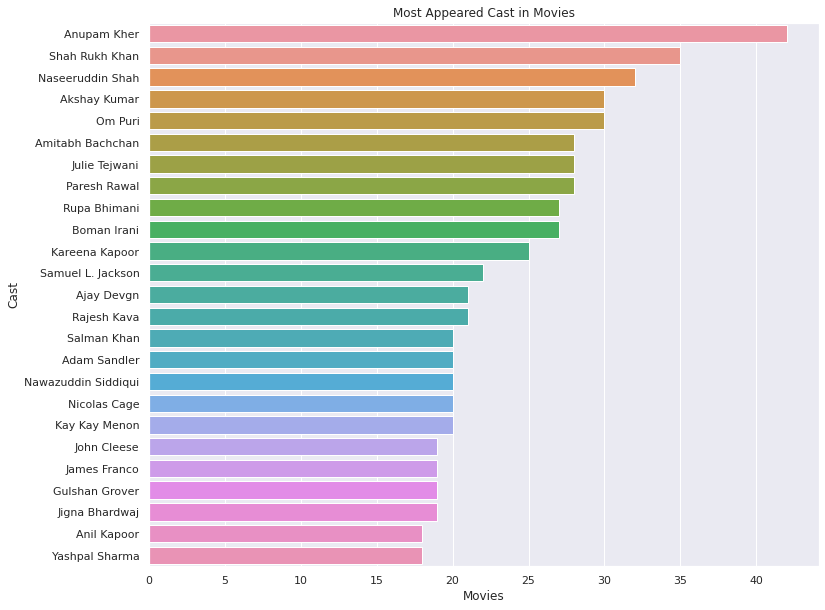

In [61]:
plt.figure(figsize=(12,10))
sns.barplot(y='cast_name', x='count', data=movie_cast.iloc[:25])
plt.title('Most Appeared Cast in Movies')
plt.xlabel('Movies')
plt.ylabel('Cast')
plt.show()

## Best month to release TV Show on Netflix by any producer?
## Probably the month with the least amount of TV Shows added.

In [62]:
netflix_tv_shows = netflix[netflix['type'] == 'TV Show']

In [63]:
netflix_shows_date = netflix_tv_shows[['date_added']].dropna()
netflix_shows_date['date_added'] = pd.to_datetime(netflix_shows_date['date_added'])
netflix_shows_date['year'] = netflix_shows_date['date_added'].dt.year
netflix_shows_date['month'] = netflix_shows_date['date_added'].dt.month
netflix_shows_date['month_name'] = netflix_shows_date['date_added'].dt.month_name()
netflix_shows_date.head(3)

,date_added,year,month,month_name
1,2021-09-24,2021,9,September
2,2021-09-24,2021,9,September
3,2021-09-24,2021,9,September


In [64]:
month_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
date_df = netflix_shows_date.groupby('year')['month_name'].value_counts().unstack().fillna(0)[month_order]
date_df.head(3)

month_name,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0
2014,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


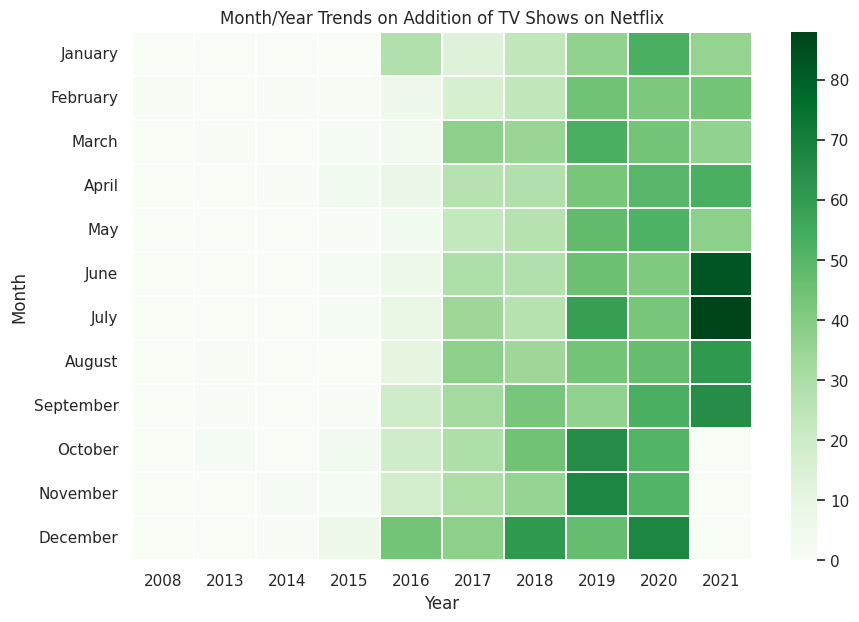

In [65]:
plt.figure(figsize=(10, 7), dpi=100)
sns.heatmap(date_df.T, cmap='Greens', linewidths=0.5)
plt.title('Month/Year Trends on Addition of TV Shows on Netflix')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

**Seeing the latest trend, i.e., 2019, 2020 & 2021, most of the TV Shows are added during June and later months. So January to May seems like better choice for releasing TV Series on the platform.**

## TV Servies Data Analysis

In [66]:
netflix_tv_shows['country'] = [None if pd.isna(x) else tuple(y.strip() for y in x.strip().split(',')) for x in netflix_tv_shows['country']]

In [67]:
# dropping NaN values here
tv_show_countries = netflix_tv_shows['country'].explode().dropna().value_counts().rename_axis('country').reset_index(name='counts')

### Countries with most TV Shows available on Netflix

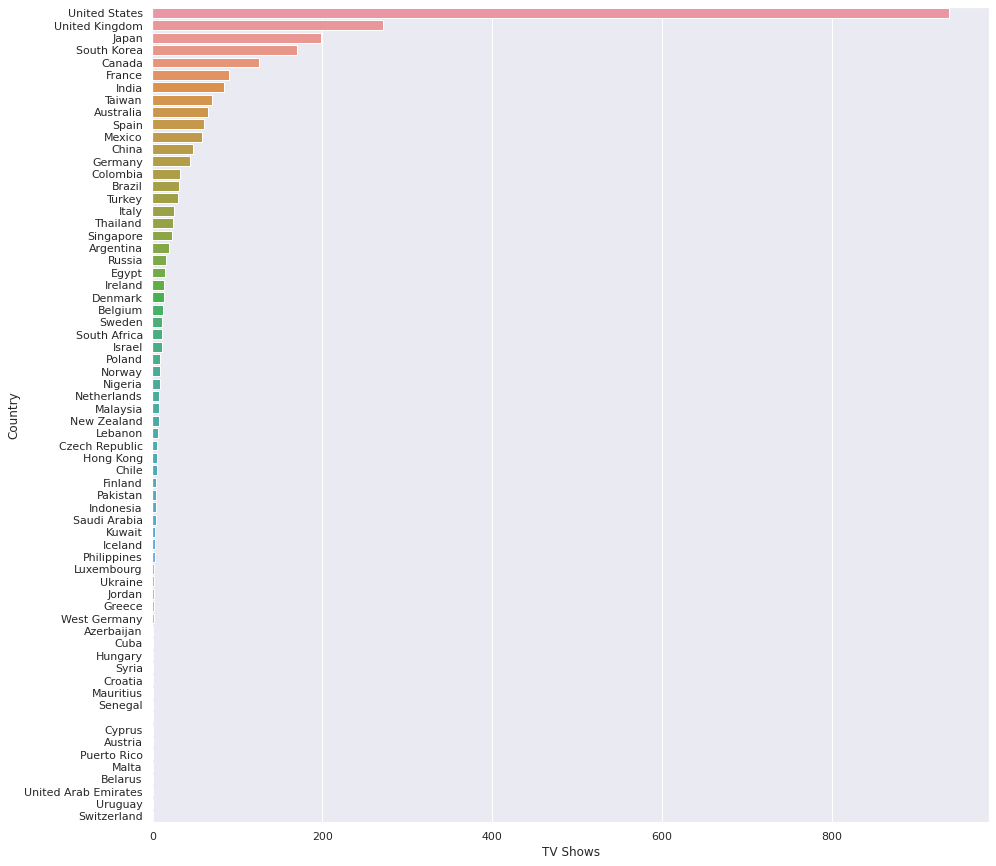

In [68]:
plt.figure(figsize=(15,15))
sns.barplot(y='country', x='counts', data=tv_show_countries)
plt.xlabel('TV Shows')
plt.ylabel('Country')
plt.show()

**United States has the most TV series on Netflix, its on completely different scale as shown in the plot.**

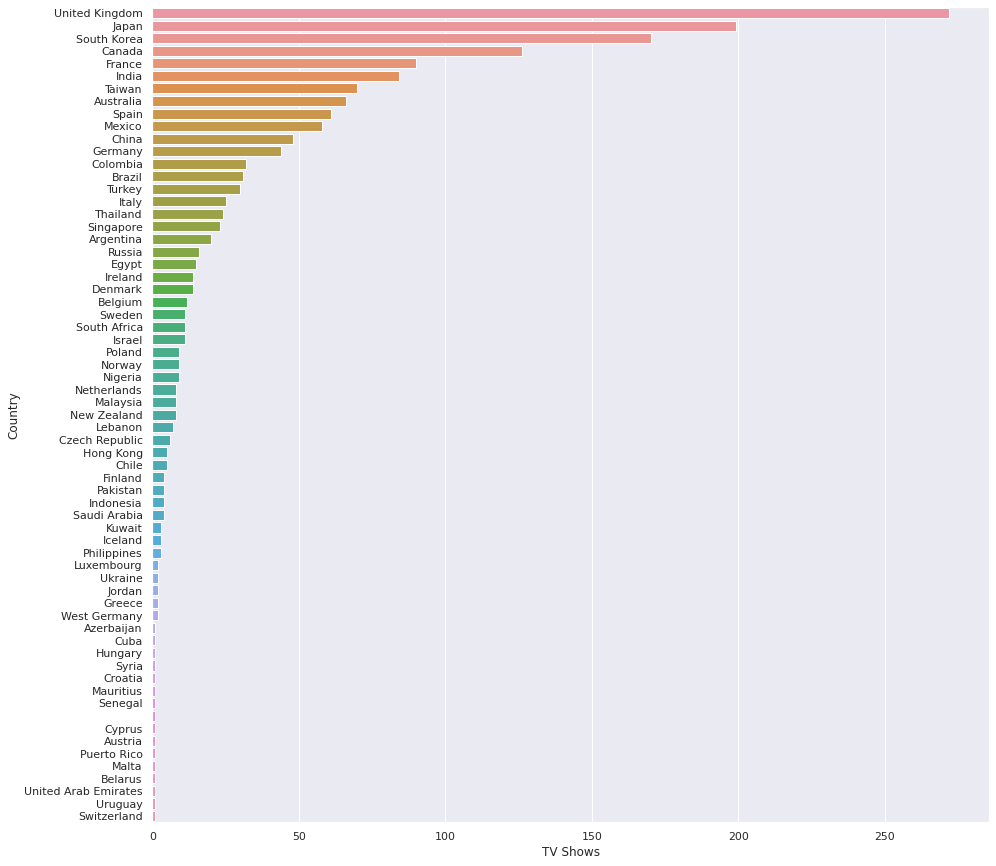

In [69]:
# Removing USA from the above plot
plt.figure(figsize=(15,15))
sns.barplot(y='country', x='counts', data=tv_show_countries[1:])
plt.xlabel('TV Shows')
plt.ylabel('Country')
plt.show()

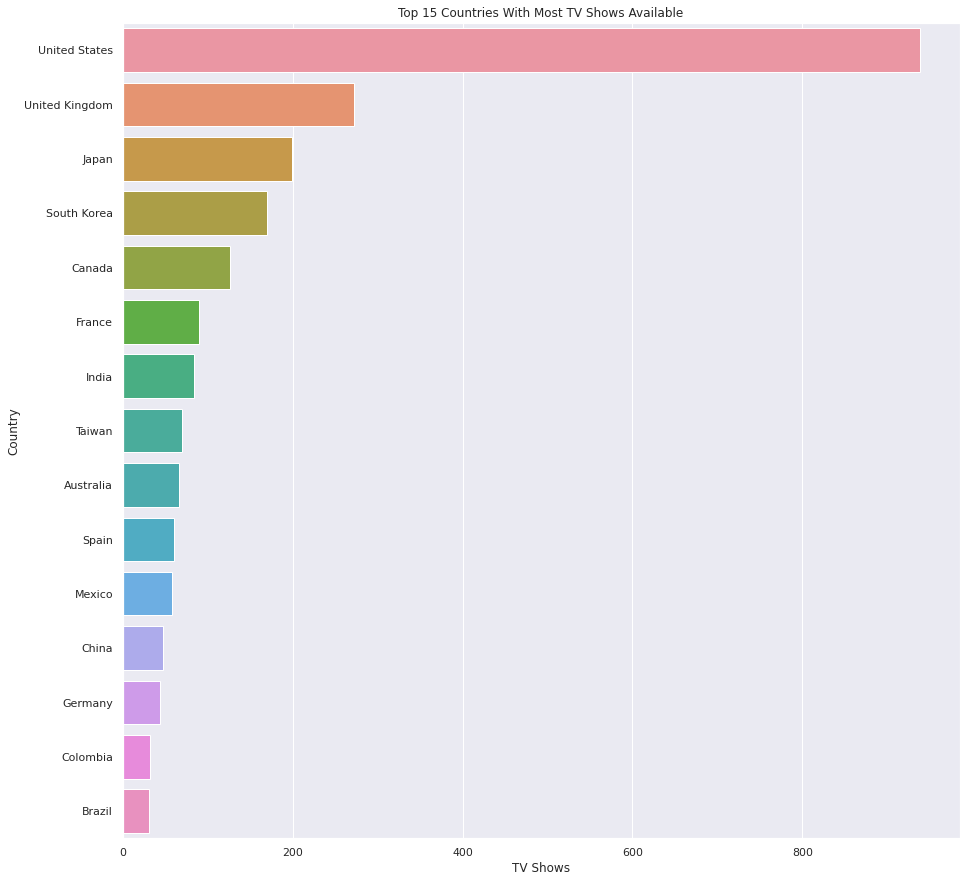

In [70]:
plt.figure(figsize=(15,15))
sns.barplot(y='country', x='counts', data=tv_show_countries[:15])
plt.title('Top 15 Countries With Most TV Shows Available')
plt.xlabel('TV Shows')
plt.ylabel('Country')
plt.show()

**Netflix should focus on other countries appart from the USA and add TV series there.**
**More TV shows should be added in India.**

In [71]:
durations = netflix_tv_shows[['title', 'duration']]
durations['seasons'] = [int(x[0]) for x in durations['duration'].str.split(' ')]
durations.sort_values(by='seasons', ascending=False, inplace=True)

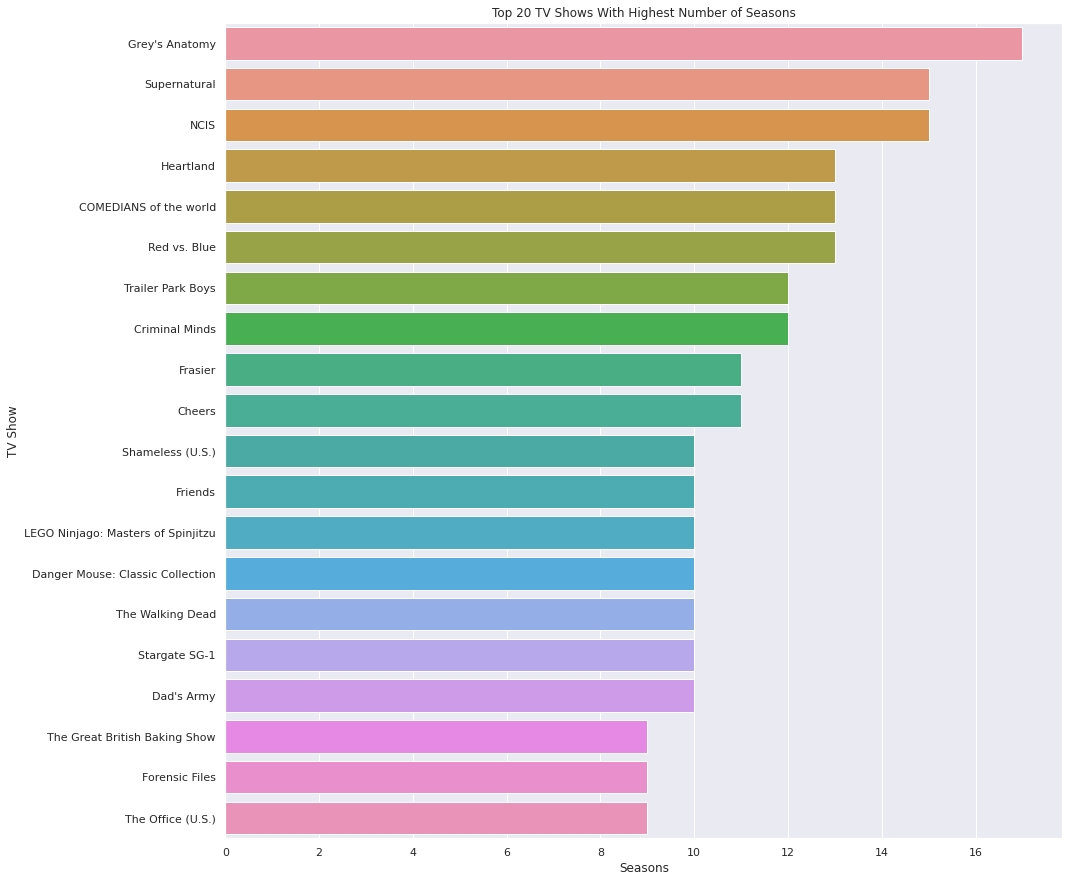

In [72]:
plt.figure(figsize=(15,15))
sns.barplot(x='seasons', y='title', data=durations[['title', 'seasons']][:20])
plt.title('Top 20 TV Shows With Highest Number of Seasons')
plt.ylabel('TV Show')
plt.xlabel('Seasons')
plt.show()

**Grey's Anatomy has the highest number of seasons, followed by NCIs and Supernaturals.**

In [73]:
single_season_shows = durations[durations['seasons']==1]

In [74]:
single_season_shows.sort_index(inplace=True)

In [75]:
single_season_shows.reset_index(drop=True, inplace=True)
single_season_shows.index = single_season_shows.index + 1
single_season_shows

,title,duration,seasons
1,Ganglands,1 Season,1
2,Jailbirds New Orleans,1 Season,1
3,Midnight Mass,1 Season,1
4,"Vendetta: Truth, Lies and The Mafia",1 Season,1
5,Bangkok Breaking,1 Season,1
...,...,...,...
1789,Yeh Meri Family,1 Season,1
1790,Yo-Kai Watch,1 Season,1
1791,Yoko,1 Season,1
1792,YOM,1 Season,1


**There are a total of 1793 TV Shows with only 1 Season. Binge Worthy!** 😈

In [76]:
netflix_tv_shows['cast'] = [None if pd.isna(x) else tuple(y.strip() for y in x.strip().split(',')) for x in netflix_tv_shows['cast']]
tv_shows_cast = netflix_tv_shows['cast'].explode().dropna().value_counts().rename_axis('cast_name').reset_index(name='count')

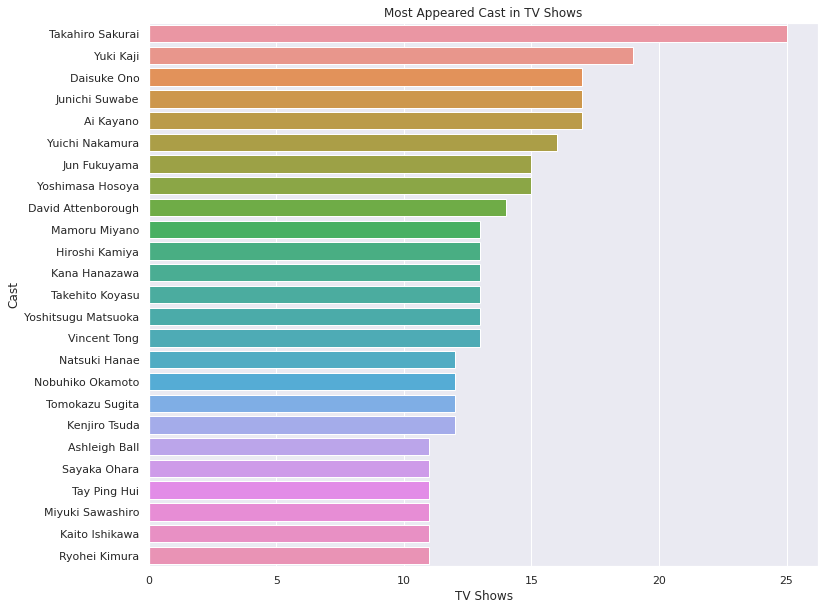

In [77]:
plt.figure(figsize=(12,10))
sns.barplot(y='cast_name', x='count', data=tv_shows_cast.iloc[:25])
plt.title('Most Appeared Cast in TV Shows')
plt.xlabel('TV Shows')
plt.ylabel('Cast')
plt.show()

## **Recommendations**



*   **Netflix should add more family shows especially TV series. Also there are no TV shows available for Teens, 13+ age group, this can be looked upon.**
*   **Netflix should focus on bringing the content amount in the English speaking countries like Canada & United Kingdom upto United States. And also the country with highest population such as India.**


# DSML Advanced : Case Study Discussion 2

*Ignore*

In [78]:
ndf = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')

In [79]:
constraint = ndf['cast'].apply(lambda x: str(x).split(',')).tolist()

In [80]:
df_new = pd.DataFrame(constraint, index=ndf['title'])
df_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,Ryle De Morny,Greteli Fincham,Sello Maake Ka-Ncube,Odwa Gwanya,Mekaila Mathys,Sandi Schultz,Duane Williams,Shamilla Miller,Patrick Mofokeng,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [81]:
df_new = df_new.stack()
df_new

title                  
Dick Johnson Is Dead  0                       nan
Blood & Water         0                Ama Qamata
                      1               Khosi Ngema
                      2             Gail Mabalane
                      3            Thabang Molaba
                                    ...          
Zubaan                3          Manish Chaudhary
                      4              Meghna Malik
                      5             Malkeet Rauni
                      6            Anita Shabdish
                      7     Chittaranjan Tripathy
Length: 64951, dtype: object

In [82]:
df_new = pd.DataFrame(df_new)
df_new

0
title                                         
Dick Johnson Is Dead 0                     nan
Blood & Water        0              Ama Qamata
                     1             Khosi Ngema
                     2           Gail Mabalane
                     3          Thabang Molaba
...                                        ...
Zubaan               3        Manish Chaudhary
                     4            Meghna Malik
                     5           Malkeet Rauni
                     6          Anita Shabdish
                     7   Chittaranjan Tripathy

[64951 rows x 1 columns]

In [83]:
df_new.reset_index(inplace=True)
df_new

,title,level_1,0
0,Dick Johnson Is Dead,0,nan
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
...,...,...,...
64946,Zubaan,3,Manish Chaudhary
64947,Zubaan,4,Meghna Malik
64948,Zubaan,5,Malkeet Rauni
64949,Zubaan,6,Anita Shabdish


In [84]:
df_new = df_new[['title', 0]]
df_new

,title,0
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [85]:
df_new.columns = ['title', 'cast_x']
df_new

,title,cast_x
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [86]:
df_cast = ndf.merge(df_new, on='title', how='inner')
df_cast

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_x
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",nan
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64946,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Manish Chaudhary
64947,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Meghna Malik
64948,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Malkeet Rauni
64949,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Anita Shabdish


In [87]:
df_cast.groupby('cast_x')['title'].count()

cast_x
  Jr.                     2
 "Riley" Lakdhar Dridi    1
 'Najite Dede             1
 2 Chainz                 1
 2Mex                     1
                         ..
İbrahim Büyükak           1
İbrahim Çelikkol          1
Şahin Irmak               1
Şükrü Özyıldız            1
Ṣọpẹ́ Dìrísù              1
Name: title, Length: 39297, dtype: int64

In [88]:
df_cast.cast_x.value_counts()

nan                       825
 Anupam Kher               39
 Rupa Bhimani              31
 Takahiro Sakurai          30
 Julie Tejwani             28
                         ... 
 Vedika                     1
 Tedros Teclebrhan          1
 Maryam Zaree               1
 Melanie Straub             1
 Chittaranjan Tripathy      1
Name: cast_x, Length: 39297, dtype: int64